$$
\Large \text{Feature extraction for the developing  a  scorecard  for  credit  analysis}
$$

In [1]:
import pandas as pd
import numpy as np
import math,os,sys

import seaborn as sns
import matplotlib.pyplot as plt

from functools import partial

sns.set_style(style= 'darkgrid')
sns.set_context("notebook")
%matplotlib inline
%load_ext lab_black

In [2]:
CSV_PATH = r"""C:\Users\M1049231\Downloads\UCI_Credit_Card.csv"""
df_raw = pd.read_csv(CSV_PATH)

In [3]:
df_raw.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# Setting the target variable 
y_raw = df_raw['default.payment.next.month']
df_raw["MARRIAGE"] = np.where(df_raw.MARRIAGE == 0 , 2, df_raw.MARRIAGE )
df_raw["EDUCATION"] = np.where(df_raw.EDUCATION == 0 , 2, df_raw.EDUCATION )


In [5]:
for idx in range(1,7):
    df_raw[f"BAL_AMT{idx}"]  = df_raw[f"BILL_AMT{idx}"] - df_raw[f"PAY_AMT{idx}"]

In [6]:
df_raw.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BAL_AMT1,BAL_AMT2,BAL_AMT3,BAL_AMT4,BAL_AMT5,BAL_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,30000.00000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.854067,1.555467,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,4826.076867,4799.387633,5215.502567,0.221200,45559.750400,4.325791e+04,4.178747e+04,38436.87210,35512.013333,33656.257833
std,8660.398374,129747.661567,0.489129,0.789340,0.518137,9.217904,1.123802,1.197186,1.196868,1.169139,...,15666.159744,15278.305679,17777.465775,0.415062,73173.789447,7.256594e+04,6.929536e+04,64200.61083,60553.370054,60151.290836
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,-733744.000000,-1.702347e+06,-8.546410e+05,-667000.00000,-414380.000000,-684896.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,296.000000,252.500000,117.750000,0.000000,745.000000,3.295000e+02,2.627500e+02,230.00000,0.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,1500.000000,1500.000000,1500.000000,0.000000,18550.500000,1.810250e+04,1.776900e+04,16970.00000,15538.000000,13926.500000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,4013.250000,4031.500000,4000.000000,0.000000,62241.500000,5.907775e+04,5.629425e+04,50259.50000,46961.500000,46067.250000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,621000.000000,426529.000000,528666.000000,1.000000,913727.000000,9.332080e+05,1.542258e+06,841586.00000,877171.000000,911408.000000


In [7]:
df_raw["BAL_AMT_MEAN"]  = df_raw[['BAL_AMT1', 'BAL_AMT2', 'BAL_AMT3', 'BAL_AMT4', 'BAL_AMT5', 'BAL_AMT6']].mean(axis = 1)

In [8]:
df_raw.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'BAL_AMT1', 'BAL_AMT2', 'BAL_AMT3',
       'BAL_AMT4', 'BAL_AMT5', 'BAL_AMT6', 'BAL_AMT_MEAN'],
      dtype='object')

In [9]:
ENGG_FEAT_COL = ['AGE','LIMIT_BAL','BAL_AMT1', 'BAL_AMT2', 'BAL_AMT3',
       'BAL_AMT4', 'BAL_AMT5', 'BAL_AMT6', 'BAL_AMT_MEAN' ]
REV_FEAT_COL = [ 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
OTHER_FEAT_COL = ['SEX', 'EDUCATION', 'MARRIAGE']
FINAL_FEAT = []

In [10]:
def binning(df, colname, bins:list):

    assert len(bins) == 3
    res_df = pd.DataFrame()
    res_df[f'{colname}_<={bins[0]}'] = np.where(df[colname] <= bins[0] ,1 , 0)
    res_df[f'{colname}_{bins[0]}<{bins[1]}'] = np.where(((df[colname] >bins[0]) & (df[colname] <bins[1])) ,1 , 0)
    res_df[f'{colname}_{bins[1]}<{bins[2]}'] = np.where(((df[colname] >bins[1]) & (df[colname] <bins[2])) ,1 , 0)
    res_df[f'{colname}_>{bins[2]}'] = np.where(df[colname] > bins[2] ,1 , 0)

    return res_df

def get_bins(df):
    _ = df.describe()
    bin_range = {}
    for col in _.columns:
        bin_range[col] = [_[col]['25%'].round(2), _[col]['50%'].round(2), _[col]['75%'].round(2)]
    
    return bin_range

<h2>BINNING OF ENGG FEATURES

In [11]:
bin_val = get_bins(df_raw)
inital_columns = df_raw.columns.values

for i in ENGG_FEAT_COL:
    df_raw = pd.concat([df_raw, binning(df_raw, colname= i, bins= bin_val[i])], axis = 1)

# add all the new columns to the feature list
new_cols = set(df_raw.columns.values) ^ set(inital_columns)
assert len(new_cols) == 4*len(ENGG_FEAT_COL) , "do not continue"
FINAL_FEAT.extend(new_cols)

print(FINAL_FEAT)


['BAL_AMT_MEAN_16987.17<50952.96', 'AGE_34.0<41.0', 'AGE_>41.0', 'BAL_AMT5_>46961.5', 'LIMIT_BAL_<=50000.0', 'BAL_AMT3_262.75<17769.0', 'BAL_AMT2_>59077.75', 'BAL_AMT_MEAN_753.46<16987.17', 'BAL_AMT3_>56294.25', 'BAL_AMT2_329.5<18102.5', 'LIMIT_BAL_140000.0<240000.0', 'BAL_AMT1_18550.5<62241.5', 'BAL_AMT1_<=745.0', 'BAL_AMT5_0.0<15538.0', 'AGE_28.0<34.0', 'BAL_AMT4_230.0<16970.0', 'BAL_AMT3_<=262.75', 'BAL_AMT4_<=230.0', 'BAL_AMT4_16970.0<50259.5', 'BAL_AMT6_<=0.0', 'BAL_AMT2_18102.5<59077.75', 'BAL_AMT6_>46067.25', 'LIMIT_BAL_>240000.0', 'BAL_AMT_MEAN_>50952.96', 'BAL_AMT2_<=329.5', 'BAL_AMT5_<=0.0', 'LIMIT_BAL_50000.0<140000.0', 'BAL_AMT_MEAN_<=753.46', 'AGE_<=28.0', 'BAL_AMT1_745.0<18550.5', 'BAL_AMT6_0.0<13926.5', 'BAL_AMT5_15538.0<46961.5', 'BAL_AMT6_13926.5<46067.25', 'BAL_AMT4_>50259.5', 'BAL_AMT1_>62241.5', 'BAL_AMT3_17769.0<56294.25']


In [12]:
4*len(ENGG_FEAT_COL)

36

<h3>OPERATING ON 'PAY_i'

In [13]:
def get_payment_info(row, cols):
    num_defaults = 0
    sum_defaults = 0
    for i in cols:
        if row[i] > 0:
            num_defaults = 1 # change this to get total defaluts in last 6 months
            sum_defaults += row[i] # gives total months defaults
    return pd.Series([num_defaults, sum_defaults])

In [14]:
# Get number of ontime payments  the category >5, 5, 5>
# get sum of payment dues ie, >2 , 2-1, 1>
# number of default months 
# df_raw[REV_FEAT_COL].sum(axis = 1)
_get_payment_info = partial(get_payment_info, cols = REV_FEAT_COL)
df_raw[['HAS_DEFAULT', 'TOT_DEFAULT']] = df_raw.apply(_get_payment_info, axis = 1)

In [15]:
df_raw.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BAL_AMT6_<=0.0,BAL_AMT6_0.0<13926.5,BAL_AMT6_13926.5<46067.25,BAL_AMT6_>46067.25,BAL_AMT_MEAN_<=753.46,BAL_AMT_MEAN_753.46<16987.17,BAL_AMT_MEAN_16987.17<50952.96,BAL_AMT_MEAN_>50952.96,HAS_DEFAULT,TOT_DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.00000,30000.00000,30000.00000,30000.00000,30000.00000,30000.00000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.854067,1.555467,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,0.279367,0.220633,0.25000,0.25000,0.25000,0.25000,0.25000,0.25000,0.335633,1.687700
std,8660.398374,129747.661567,0.489129,0.789340,0.518137,9.217904,1.123802,1.197186,1.196868,1.169139,...,0.448695,0.414681,0.43302,0.43302,0.43302,0.43302,0.43302,0.43302,0.472219,3.609322
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.25000,0.25000,0.25000,0.25000,0.25000,0.25000,1.000000,2.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,1.000000,1.000000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.000000,36.000000


In [16]:
df_raw['TOT_DEFAULT_0'] = np.where(df_raw.TOT_DEFAULT == 0 ,1 , 0)
df_raw['TOT_DEFAULT_0<2'] = np.where(((df_raw.TOT_DEFAULT >0) & (df_raw.TOT_DEFAULT <2)) ,1 , 0)
df_raw['TOT_DEFAULT_>2'] = np.where(df_raw.TOT_DEFAULT > 2 ,1 , 0)

In [17]:
FINAL_FEAT.extend(['HAS_DEFAULT','TOT_DEFAULT_0','TOT_DEFAULT_0<2','TOT_DEFAULT_>2'])

#DONE with pay_i

In [18]:
print(FINAL_FEAT, "\n\n",len(FINAL_FEAT))

['BAL_AMT_MEAN_16987.17<50952.96', 'AGE_34.0<41.0', 'AGE_>41.0', 'BAL_AMT5_>46961.5', 'LIMIT_BAL_<=50000.0', 'BAL_AMT3_262.75<17769.0', 'BAL_AMT2_>59077.75', 'BAL_AMT_MEAN_753.46<16987.17', 'BAL_AMT3_>56294.25', 'BAL_AMT2_329.5<18102.5', 'LIMIT_BAL_140000.0<240000.0', 'BAL_AMT1_18550.5<62241.5', 'BAL_AMT1_<=745.0', 'BAL_AMT5_0.0<15538.0', 'AGE_28.0<34.0', 'BAL_AMT4_230.0<16970.0', 'BAL_AMT3_<=262.75', 'BAL_AMT4_<=230.0', 'BAL_AMT4_16970.0<50259.5', 'BAL_AMT6_<=0.0', 'BAL_AMT2_18102.5<59077.75', 'BAL_AMT6_>46067.25', 'LIMIT_BAL_>240000.0', 'BAL_AMT_MEAN_>50952.96', 'BAL_AMT2_<=329.5', 'BAL_AMT5_<=0.0', 'LIMIT_BAL_50000.0<140000.0', 'BAL_AMT_MEAN_<=753.46', 'AGE_<=28.0', 'BAL_AMT1_745.0<18550.5', 'BAL_AMT6_0.0<13926.5', 'BAL_AMT5_15538.0<46961.5', 'BAL_AMT6_13926.5<46067.25', 'BAL_AMT4_>50259.5', 'BAL_AMT1_>62241.5', 'BAL_AMT3_17769.0<56294.25', 'HAS_DEFAULT', 'TOT_DEFAULT_0', 'TOT_DEFAULT_0<2', 'TOT_DEFAULT_>2'] 

 40


In [19]:
# fig,ax = plt.subplots(3,2,figsize=(13, 7))
# # sns.catplot(x = 'default.payment.next.month' , y = 'BAL_AMT_MEAN', data = df_raw, kind = "box")
# l,r = 0,0
# for idx in range(1,7):
    
#     sns.kdeplot(df_raw[df_raw['default.payment.next.month'] == 0][f'BAL_AMT{idx}'], ax = ax[l,r])
#     sns.kdeplot(df_raw[df_raw['default.payment.next.month'] == 1][f'BAL_AMT{idx}'], ax = ax[l,r])
#     if r == 0:
#         r += 1
#     elif r == 1:
#         l +=1
#         r = 0

#     else:
#         assert False, 'this can not happen'

In [20]:
# sns.kdeplot(df_raw[df_raw['default.payment.next.month'] == 0][f'LIMIT_BAL'],)
# sns.kdeplot(df_raw[df_raw['default.payment.next.month'] == 1][f'LIMIT_BAL'],)

<h3> Let us handle the OTHER_FEAT

In [21]:
# function to create dummy variables
def dummy_creation(df, columns_list):
    df_dummies = []
    for col in columns_list:
        df_dummies.append(pd.get_dummies(df[col], prefix = col, prefix_sep = ':'))
    df_dummies = pd.concat(df_dummies, axis = 1)
    df = pd.concat([df, df_dummies], axis = 1)
    return df

In [22]:
inital_columns = df_raw.columns.values

# apply to our final four categorical variables
print("the other features are : ", OTHER_FEAT_COL)
df_raw = dummy_creation(df_raw, OTHER_FEAT_COL)

# drop_cols = [f'{i}:1' for i in OTHER_FEAT_COL]
# df_raw.drop(drop_cols, axis= 1, inplace= True)

new_cols = set(df_raw.columns.values) ^ set(inital_columns)
print("new columns were :", new_cols)
FINAL_FEAT.extend(new_cols)


the other features are :  ['SEX', 'EDUCATION', 'MARRIAGE']
new columns were : {'EDUCATION:5', 'MARRIAGE:1', 'EDUCATION:2', 'SEX:2', 'MARRIAGE:2', 'EDUCATION:1', 'EDUCATION:4', 'EDUCATION:3', 'SEX:1', 'MARRIAGE:3', 'EDUCATION:6'}


In [23]:
df_raw.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'BAL_AMT1', 'BAL_AMT2', 'BAL_AMT3',
       'BAL_AMT4', 'BAL_AMT5', 'BAL_AMT6', 'BAL_AMT_MEAN', 'AGE_<=28.0',
       'AGE_28.0<34.0', 'AGE_34.0<41.0', 'AGE_>41.0', 'LIMIT_BAL_<=50000.0',
       'LIMIT_BAL_50000.0<140000.0', 'LIMIT_BAL_140000.0<240000.0',
       'LIMIT_BAL_>240000.0', 'BAL_AMT1_<=745.0', 'BAL_AMT1_745.0<18550.5',
       'BAL_AMT1_18550.5<62241.5', 'BAL_AMT1_>62241.5', 'BAL_AMT2_<=329.5',
       'BAL_AMT2_329.5<18102.5', 'BAL_AMT2_18102.5<59077.75',
       'BAL_AMT2_>59077.75', 'BAL_AMT3_<=262.75', 'BAL_AMT3_262.75<17769.0',
       'BAL_AMT3_17769.0<56294.25', 'BAL_AMT3_>56294.25', 'BAL_AMT4_<=230.0',
       'BAL_AMT4_230.0<16970.0', 'BAL_AMT4_16970.0

In [29]:
FINAL_FEAT_v2 = [i for i in FINAL_FEAT if 'BAL_AMT_' in i or 'BAL_AMT' not in i]
FINAL_FEAT_v2.remove('HAS_DEFAULT')
FINAL_FEAT_v2

['BAL_AMT_MEAN_16987.17<50952.96',
 'AGE_34.0<41.0',
 'AGE_>41.0',
 'LIMIT_BAL_<=50000.0',
 'BAL_AMT_MEAN_753.46<16987.17',
 'LIMIT_BAL_140000.0<240000.0',
 'AGE_28.0<34.0',
 'LIMIT_BAL_>240000.0',
 'BAL_AMT_MEAN_>50952.96',
 'LIMIT_BAL_50000.0<140000.0',
 'BAL_AMT_MEAN_<=753.46',
 'AGE_<=28.0',
 'TOT_DEFAULT_0',
 'TOT_DEFAULT_0<2',
 'TOT_DEFAULT_>2',
 'EDUCATION:5',
 'MARRIAGE:1',
 'EDUCATION:2',
 'SEX:2',
 'MARRIAGE:2',
 'EDUCATION:1',
 'EDUCATION:4',
 'EDUCATION:3',
 'SEX:1',
 'MARRIAGE:3',
 'EDUCATION:6']

In [25]:
len(FINAL_FEAT)

51

In [26]:
# added 8 features 
# pay_i added 4 features 
# ENGG_COL added 36 features
# total should be 48 features 

In [30]:
from utils import efx_utils

efx_utils._save(df_raw, "X")
efx_utils._save(y_raw.values.reshape(30000,), "y")
efx_utils._save(FINAL_FEAT, "FINAL_FEAT")
efx_utils._save(FINAL_FEAT_v2, "FINAL_FEAT_V2")

## Modeling 


In [27]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency

In [66]:
X_train.columns

Index(['AGE_28.0<34.0', 'LIMIT_BAL_>240000.0',
       'BAL_AMT_MEAN_16987.17<50952.96', 'BAL_AMT_MEAN_<=753.46',
       'AGE_34.0<41.0', 'LIMIT_BAL_<=50000.0', 'BAL_AMT_MEAN_>50952.96',
       'BAL_AMT_MEAN_753.46<16987.17', 'AGE_<=28.0',
       'LIMIT_BAL_140000.0<240000.0', 'AGE_>41.0',
       'LIMIT_BAL_50000.0<140000.0', 'HAS_DEFAULT', 'TOT_DEFAULT_0',
       'TOT_DEFAULT_0<2', 'TOT_DEFAULT_>2', 'MARRIAGE:3', 'EDUCATION:5',
       'EDUCATION:6', 'EDUCATION:4', 'EDUCATION:3', 'MARRIAGE:2', 'SEX:2',
       'EDUCATION:2'],
      dtype='object')

In [79]:
# define modeling pipeline
model = LogisticRegression(max_iter=1000, class_weight = 'balanced')

pipeline = Pipeline(steps=[('model', model)])

# define cross-validation criteria. RepeatedStratifiedKFold automatially takes care of the class imbalance while splitting
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# fit and evaluate the logistic regression pipeline with cross-validation as defined in cv
scores = cross_val_score(pipeline, X_trian, y_train, scoring = 'roc_auc', cv = cv)
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1

# print the mean AUROC score and Gini
print('Mean AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (GINI))

Mean AUROC: 0.7524
Gini: 0.5048


In [68]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [69]:
feature_name = X_train.columns.values
# Create a summary table of our logistic regression model
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Create a new column in the dataframe, called 'Coefficients', with row values the transposed coefficients from the 'LogisticRegression' model
summary_table['Coefficients'] = np.transpose(pipeline['model'].coef_)
# Increase the index of every row of the dataframe with 1 to store our model intercept in 1st row
summary_table.index = summary_table.index + 1
# Assign our model intercept to this new row
summary_table.loc[0] = ['Intercept', pipeline['model'].intercept_[0]]
# Sort the dataframe by index
summary_table.sort_index(inplace = True)
# summary_table

In [70]:
summary_table["coff_mag"] = abs(summary_table.Coefficients)
summary_table.sort_values('coff_mag', ascending= False, inplace= True)

<AxesSubplot:xlabel='Feature name', ylabel='coff_mag'>

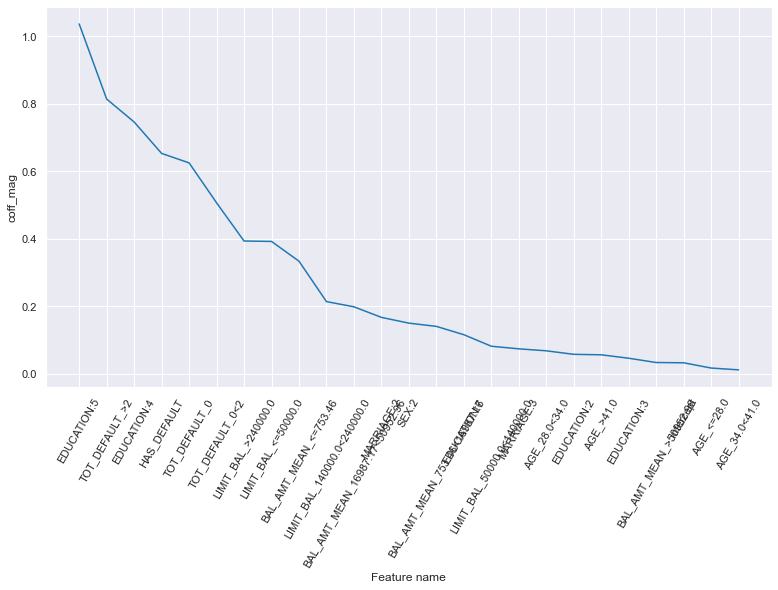

In [71]:
fig,ax = plt.subplots(figsize=(13, 7))
plt.xticks(rotation=60)
sns.lineplot(x = 'Feature name' , y = 'coff_mag', data= summary_table, ax = ax, )

In [72]:
# make preditions on our test set
y_hat_test = pipeline.predict(X_test)
# get the predicted probabilities
y_hat_test_proba = pipeline.predict_proba(X_test)
# select the probabilities of only the positive class (class 1 - default) 
y_hat_test_proba = y_hat_test_proba[:][: , 1]

# we will now create a new DF with actual classes and the predicted probabilities
# create a temp y_test DF to reset its index to allow proper concaternation with y_hat_test_proba
y_test_temp = pd.DataFrame(y_test.copy())
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# check the shape to make sure the number of rows is same as that in y_test
# y_test_proba.shape

# Rename the columns
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba']
# Makes the index of one dataframe equal to the index of another dataframe.
y_test_proba.index = X_test.index

In [73]:
# assign a threshold value to differentiate good with bad
tr = 0.5
# crate a new column for the predicted class based on predicted probabilities and threshold
# We will determine this optimat threshold later in this project
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
# create the confusion matrix
confusion_matrix(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'], normalize = 'all')

array([[0.597     , 0.18183333],
       [0.0865    , 0.13466667]])

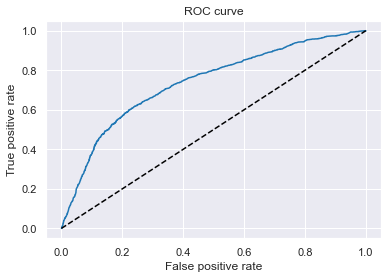

In [74]:

# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, with dashed line style and black color to represent a no-skill classifier
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [75]:
# Calculate the Area Under the Receiver Operating Characteristic Curve (AUROC) on our test set
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
AUROC


0.7371241193658322

In [76]:

# calculate Gini from AUROC
Gini = AUROC * 2 - 1
Gini

0.47424823873166444

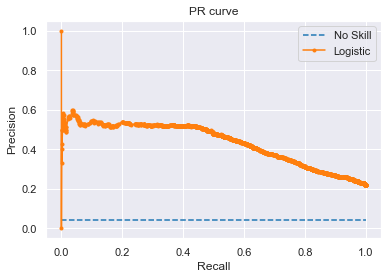

In [77]:

# draw a PR curve
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [78]:
# calculate PR AUC
auc_pr = auc(recall, precision)
auc_pr

0.43585441032140426